In [2]:
import numpy as np
from scipy.signal import spectrogram
rng = np.random.default_rng()
import matplotlib.pyplot as plt

In [18]:
fs = 256

N = fs*7

amp = 2 * np.sqrt(2)

noise_power = 0.01 * fs / 2

time = np.arange(N) / float(fs)

mod = 500*np.cos(2*np.pi*0.25*time)

carrier = amp * np.sin(2*np.pi*3e3*time + mod)

noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)

noise *= np.exp(-time/5)

x = carrier + noise

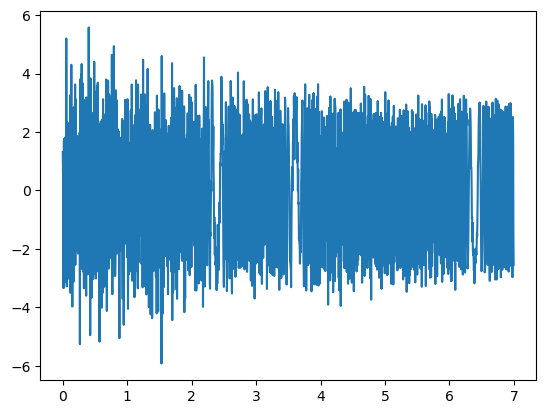

In [20]:
plt.plot(time, x)

In [21]:
len(x)

1792

In [22]:
juan = spectrogram(x, fs)

In [30]:
juan[2]

array([[1.04578109e-06, 2.31291433e-04, 7.54774928e-05, 1.14327816e-02,
        6.31687141e-04, 1.21328677e-05, 3.83557792e-04],
       [6.22937343e-03, 8.61499289e-04, 9.30886229e-03, 4.17817232e-03,
        4.66686246e-02, 2.01998687e-03, 1.35617637e-03],
       [3.71548492e-03, 9.25130153e-03, 2.01378514e-02, 2.01891720e-03,
        4.28559118e-02, 1.20713325e-03, 3.64191258e-04],
       [1.37757000e-02, 1.26567172e-02, 3.32378598e-02, 4.06264397e-04,
        3.18932891e-02, 2.81073852e-04, 9.40619079e-04],
       [3.77799334e-03, 5.01456733e-03, 6.85474074e-02, 9.29557920e-03,
        4.05210765e-02, 4.84897409e-04, 2.35140610e-03],
       [6.06676974e-03, 2.58426928e-03, 5.50258651e-02, 9.54893305e-03,
        5.57926511e-02, 6.47369406e-04, 3.48439760e-03],
       [1.56932398e-03, 2.18350368e-03, 1.28151794e-01, 7.63784042e-03,
        7.50891214e-02, 4.60242231e-05, 6.57659458e-04],
       [6.85639490e-03, 1.45618316e-03, 1.31589300e-01, 1.67948812e-02,
        5.17605484e-02, 3

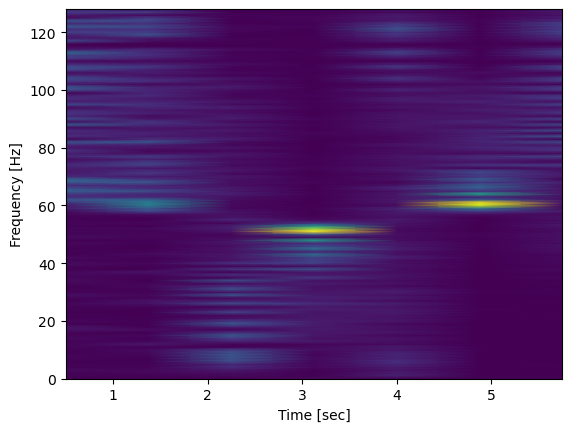

In [25]:
plt.pcolormesh(juan[1], juan[0], juan[2], shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()

In [48]:
import torch
import numpy
a = torch.zeros(32,512,182)
b = torch.zeros(32,512,18)
c = torch.zeros(32,512,5)

/tmp/ipykernel_341278/2214887456.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  b.T.shape


torch.Size([18, 512, 32])

In [52]:
result = torch.cat((a, b, c), dim=2)
result.shape

torch.Size([32, 512, 205])

In [54]:
torch.rand_like(a).shape


torch.Size([32, 512, 182])

In [56]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 81.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.8/788.8 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 72.3 MB/s eta 0:00:00:00:01


In [4]:
import torch
import random

def mask_tokens(inputs, tokenizer, mlm_probability=0.15):
    """
    Prepare masked tokens inputs/labels for masked language modeling.
    :param inputs: Tensor of input tokens
    :param tokenizer: Tokenizer object
    :param mlm_probability: Probability of masking a token
    :return: masked inputs, labels
    """
    labels = inputs.clone()
    # We sample a few tokens in each sequence for MLM training (with probability `mlm_probability`)
    probability_matrix = torch.full(labels.shape, mlm_probability)
    special_tokens_mask = [
        tokenizer.get_special_tokens_mask(val, already_has_special_tokens=True) for val in labels.tolist()
    ]
    probability_matrix.masked_fill_(torch.tensor(special_tokens_mask, dtype=torch.bool), value=0.0)
    masked_indices = torch.bernoulli(probability_matrix).bool()
    labels[~masked_indices] = -100  # We only compute loss on masked tokens

    # 80% of the time, replace masked input tokens with tokenizer.mask_token ([MASK])
    indices_replaced = torch.bernoulli(torch.full(labels.shape, 0.8)).bool() & masked_indices
    inputs[indices_replaced] = tokenizer.convert_tokens_to_ids(tokenizer.mask_token)

    # 10% of the time, replace masked input tokens with random word
    indices_random = torch.bernoulli(torch.full(labels.shape, 0.5)).bool() & masked_indices & ~indices_replaced
    random_words = torch.randint(len(tokenizer), labels.shape, dtype=torch.long)
    inputs[indices_random] = random_words[indices_random]

    # The rest of the time (10% of the time) keep the masked input tokens unchanged
    return inputs, labels


In [60]:
a = torch.randn(32, 182, 18, 5)

In [65]:
probability_matrix = torch.full(a.shape, 0.15)
masked_indices = torch.bernoulli(probability_matrix).bool()

In [66]:
masked_indices

tensor([[[[False, False, False, False,  True],
          [ True, False, False, False,  True],
          [False, False, False, False, False],
          ...,
          [ True,  True, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False,  True]],

         [[False, False, False, False, False],
          [False, False, False, False, False],
          [ True, False, False, False, False],
          ...,
          [ True, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],

         [[False, False, False,  True, False],
          [False, False, False,  True, False],
          [False, False, False, False, False],
          ...,
          [False,  True, False, False, False],
          [False, False, False,  True,  True],
          [False, False, False, False,  True]],

         ...,

         [[False, False, False, False, False],
          [False, False,  True, False, Fa

In [68]:
!pip install pillow

In [69]:
from transformers import BeitFeatureExtractor, BeitForMaskedImageModeling
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = BeitFeatureExtractor.from_pretrained("microsoft/beit-base-patch16-224-pt22k")
model = BeitForMaskedImageModeling.from_pretrained("microsoft/beit-base-patch16-224-pt22k")

# function to make the mask arrays. I'll mask 10 patches of the 14*14 existing patches (224/16 = 14) in the image
def make_masks(image_shape = 224, patch_shape = 16, number_of_masked_patches = 10):
    x = np.arange(0,(image_shape/patch_shape)**2)
    zeros = np.zeros_like(x)
    masked_pos = np.random.choice(np.arange((image_shape/patch_shape)**2), number_of_masked_patches, replace = False)
    zeros[masked_pos.astype(np.uint8)] = 1
    return zeros

masks = make_masks() # added this


inputs = feature_extractor(images=image, return_tensors="pt")
inputs["bool_masked_pos"] =  torch.BoolTensor(masks.reshape(1,-1)) #added this
outputs = model(**inputs)
logits = outputs.logits

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

/home/mreyes/anaconda3/envs/mne/lib/python3.12/site-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/736 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/368M [00:00<?, ?B/s]

In [71]:
def masking(batch, prob):
    mask = (torch.rand_like(batch) < prob).float()
    masked_images = batch * mask   
    return masked_images

In [6]:
a = torch.randn(32, 182, 18, 5)

In [78]:
sum(torch.isnan(torch.flatten(torch.tensor([[1, float('nan'), 2, float('nan')], [1,2,3,float('nan')]]))))

tensor(3)

In [80]:
FirstPartPathOutput='/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec'

In [82]:
import os
import numpy as np
from tqdm import tqdm

def encontrar_archivos_npy(directorio):
    archivos_npy = []
    for ruta, _, archivos in os.walk(directorio):
        for archivo in archivos:
            if archivo.endswith('.npy'):
                archivos_npy.append(os.path.join(ruta, archivo))
    return archivos_npy

def verificar_nans_en_archivo(ruta_archivo):
    try:
        datos = np.load(ruta_archivo)
        if np.isnan(datos).any():
            return True
    except Exception as e:
        print(f"Error al leer {ruta_archivo}: {e}")
    return False

def revisar_nans_en_directorio(directorio):
    archivos_npy = encontrar_archivos_npy(directorio)
    archivos_con_nans = []
    for archivo in tqdm(archivos_npy):
        if verificar_nans_en_archivo(archivo):
            archivos_con_nans.append(archivo)
    return archivos_con_nans

# Uso del script
directorio = FirstPartPathOutput
archivos_con_nans = revisar_nans_en_directorio(directorio)

if archivos_con_nans:
    print("Se encontraron NaNs en los siguientes archivos:")
    for archivo in archivos_con_nans:
        print(archivo)
else:
    print("No se encontraron NaNs en los archivos .npy.")


100%|██████████| 5258/5258 [02:01<00:00, 43.18it/s] 

Se encontraron NaNs en los siguientes archivos:
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_1900_1999.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_2800_2899.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_5800_5899.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_1400_1499.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_8700_8799.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_2900_2999.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/P_500_599.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_7500_7599.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_6700_6799.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_8900_8999.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_200_299.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/patient13/I_4900_4999.npy
/home/mreyes/Documents/Git/Tesis/EEG_spectro

In [7]:
mask = (torch.rand_like(a) < 0.15).float()
neg_mask = 1-mask

In [9]:
mask.sum()

tensor(78289.)

In [93]:
a

tensor([[[[ 1.7747e+00,  1.2955e+00, -7.6159e-01,  1.0111e+00,  1.7413e-01],
          [ 6.0052e-01, -4.3570e-01,  1.0773e+00,  2.1078e+00, -8.2529e-01],
          [-3.2154e-01, -8.8425e-01,  6.1463e-01,  9.5391e-01,  1.6903e+00],
          ...,
          [-6.9254e-01,  4.0957e-02,  1.5008e-01,  1.9114e-01, -1.6447e-01],
          [-1.6112e+00,  4.1244e-01, -7.3162e-01, -5.4347e-01, -8.6795e-01],
          [-3.8980e-01, -1.4895e-01,  5.6474e-01, -1.8766e-01,  5.1778e-01]],

         [[-1.2169e-01, -9.1380e-01,  2.5586e+00,  1.7145e+00,  1.9018e-01],
          [-1.0823e+00, -6.4051e-01, -6.7641e-01, -4.2618e-01,  2.4558e+00],
          [ 1.4341e+00, -1.1618e+00,  1.7246e+00,  5.0419e-01,  1.3981e+00],
          ...,
          [-5.8835e-01, -9.1586e-01,  1.5443e-02,  1.8311e-01, -8.5111e-01],
          [-4.4882e-01, -4.8477e-01,  1.1896e-01,  1.9649e+00, -4.7747e-01],
          [-2.1288e+00,  2.2676e-01, -5.8661e-01,  5.7880e-01,  1.4703e-01]],

         [[-1.7266e+00,  7.2967e-02, -1.45

In [103]:
torch.prod(torch.tensor(a.shape))

tensor(524160)

In [104]:
sum(torch.flatten(mask))

tensor(78773.)

In [95]:
(a*neg_mask) -(10*mask)

tensor([[[[ 1.7747e+00,  1.2955e+00, -7.6159e-01,  1.0111e+00,  1.7413e-01],
          [-1.0000e+01, -1.0000e+01,  1.0773e+00,  2.1078e+00, -8.2529e-01],
          [-3.2154e-01, -8.8425e-01,  6.1463e-01,  9.5391e-01,  1.6903e+00],
          ...,
          [-1.0000e+01,  4.0957e-02,  1.5008e-01,  1.9114e-01, -1.6447e-01],
          [-1.6112e+00,  4.1244e-01, -1.0000e+01, -5.4347e-01, -8.6795e-01],
          [-3.8980e-01, -1.4895e-01,  5.6474e-01, -1.0000e+01,  5.1778e-01]],

         [[-1.2169e-01, -9.1380e-01,  2.5586e+00, -1.0000e+01,  1.9018e-01],
          [-1.0823e+00, -1.0000e+01, -6.7641e-01, -1.0000e+01, -1.0000e+01],
          [ 1.4341e+00, -1.1618e+00,  1.7246e+00,  5.0419e-01,  1.3981e+00],
          ...,
          [-5.8835e-01, -9.1586e-01,  1.5443e-02,  1.8311e-01, -1.0000e+01],
          [-4.4882e-01, -4.8477e-01,  1.1896e-01,  1.9649e+00, -4.7747e-01],
          [-2.1288e+00, -1.0000e+01, -5.8661e-01,  5.7880e-01, -1.0000e+01]],

         [[-1.7266e+00,  7.2967e-02, -1.45

In [ ]:
from Models.Autoencoder_features import AutoEncoder
net = AutoEncoder(d_model=models, d_input=inputs, d_channel=channels, d_hz = hz, d_output=outputs, d_hidden=hiddens, q=q, v=v, h=h, N=N, dropout=dropout, pe=pe, mask=mask, device=DEVICE)
pretrain_model = '/home/mreyes/Documents/Git/Tesis/EEG_spectro_frec/spectro_1_raw_train.pth'
net.load_state_dict(torch.load(pretrain_model))